# Import necessary library

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# This data has no null values 

In [69]:
#For confirmation
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [70]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [71]:
df = df.drop(["customer_id"], axis = 1)

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [73]:
col = df.columns
for i in col:
    print(df[i].value_counts())
    print('_'*50)

credit_score
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
__________________________________________________
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
__________________________________________________
gender
Male      5457
Female    4543
Name: count, dtype: int64
__________________________________________________
age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
__________________________________________________
tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
__________________________________________________
balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556

# Data Analysis 

In [74]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


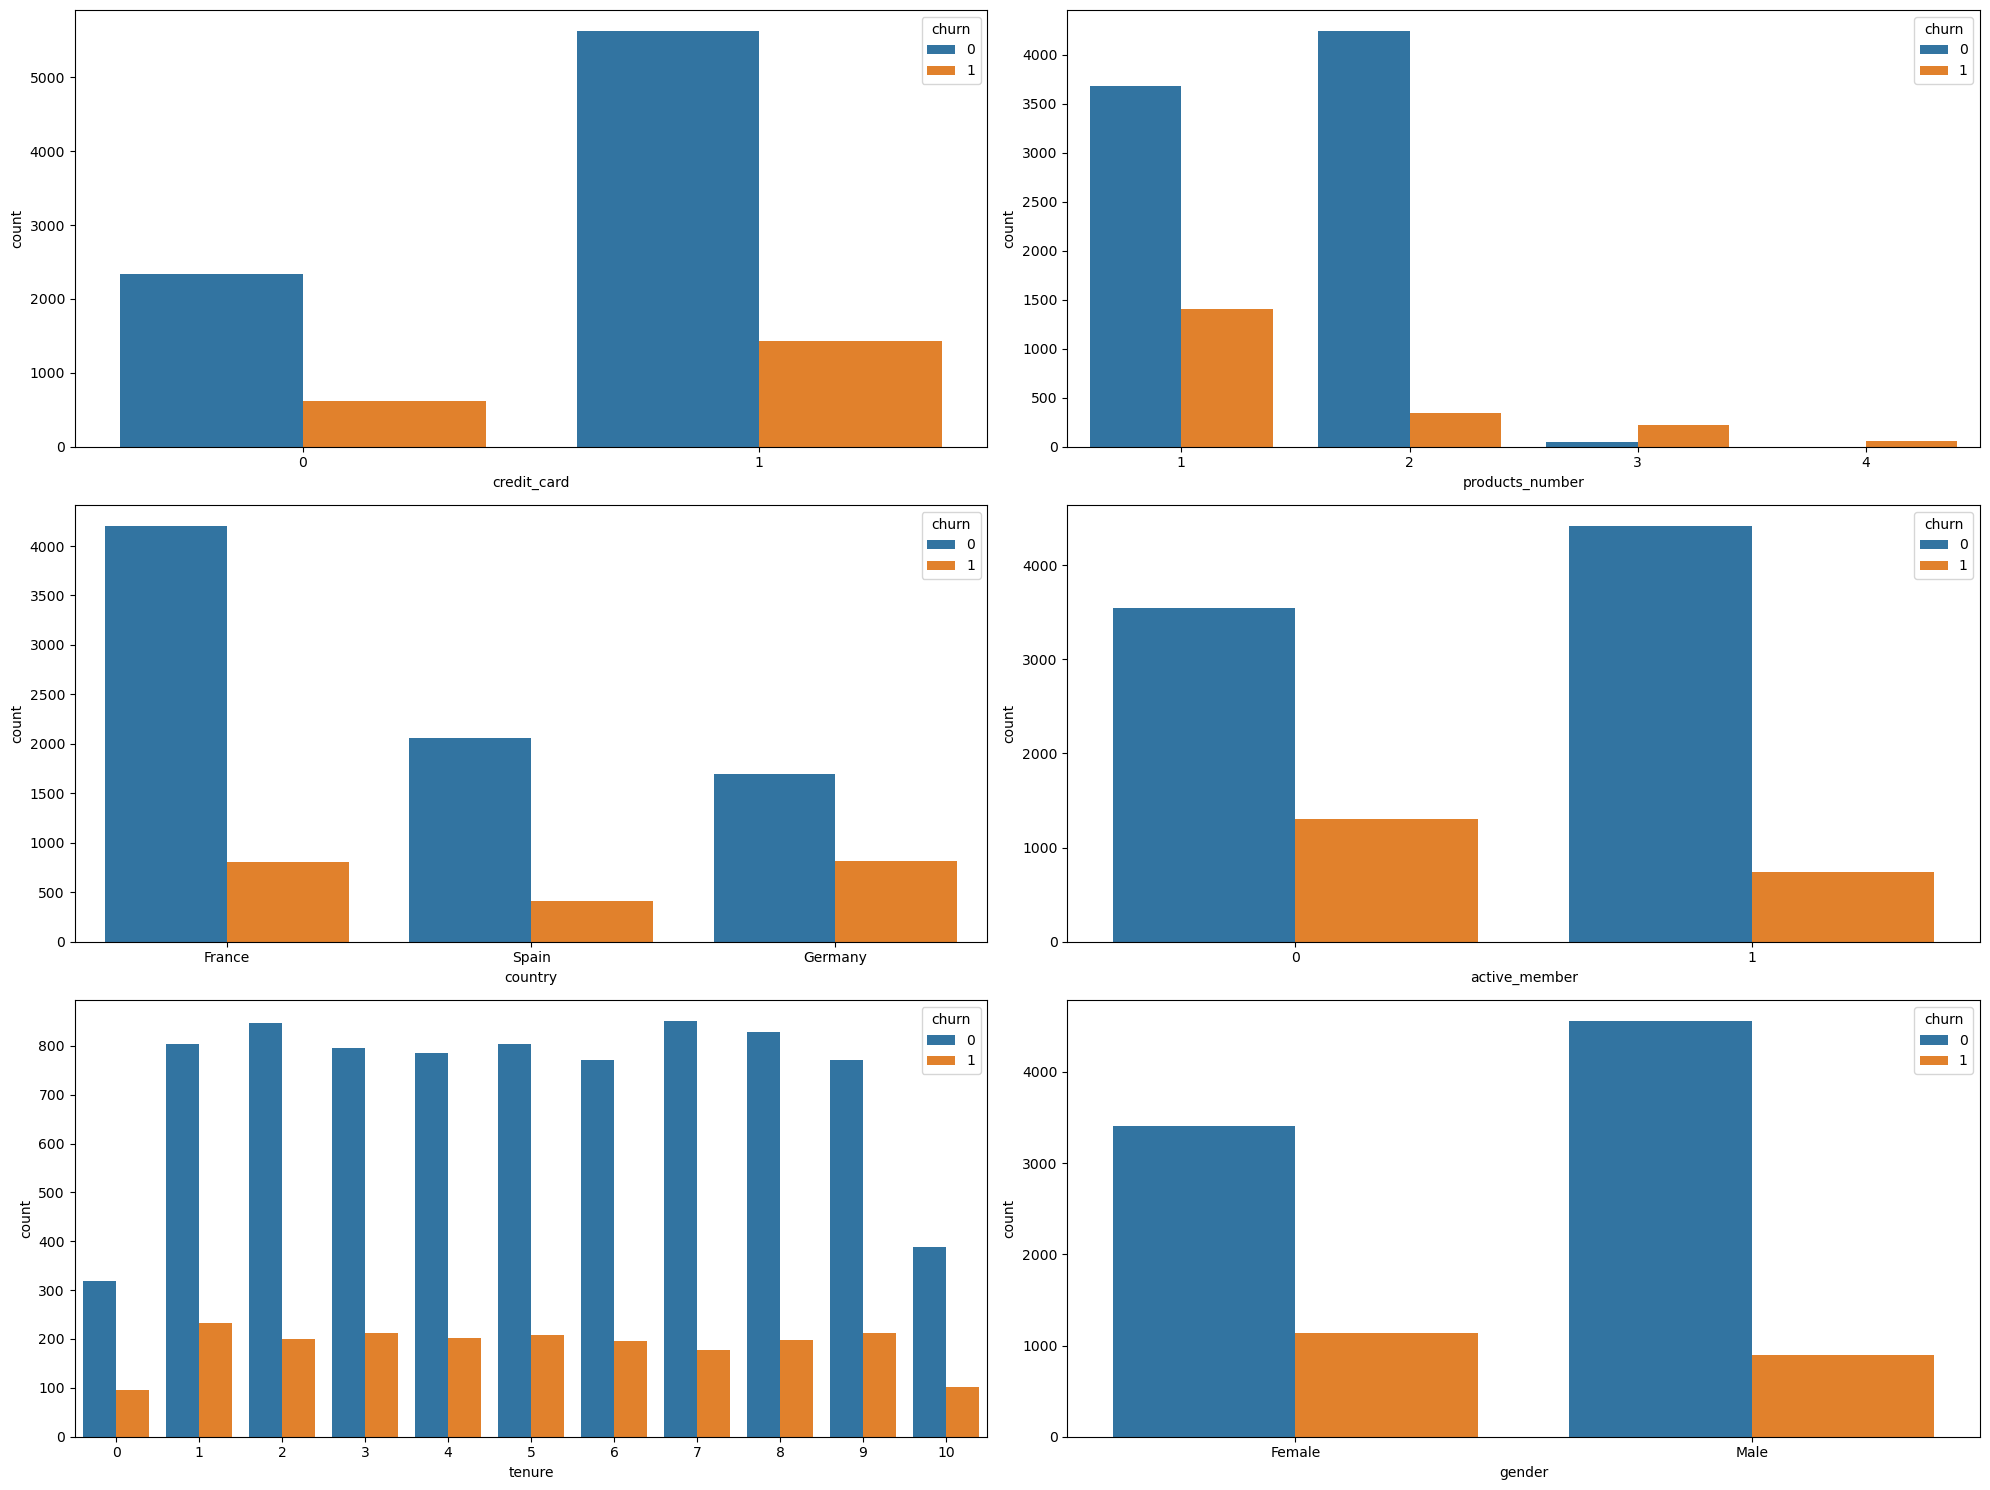

In [75]:
col_m=["credit_card","products_number","country","active_member",'tenure','gender']

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
axs=axs.flatten()
for i,var in enumerate (col_m):
    sns.countplot(data=df,x=var,hue='churn',ax=axs[i])
plt.tight_layout()
plt.show()


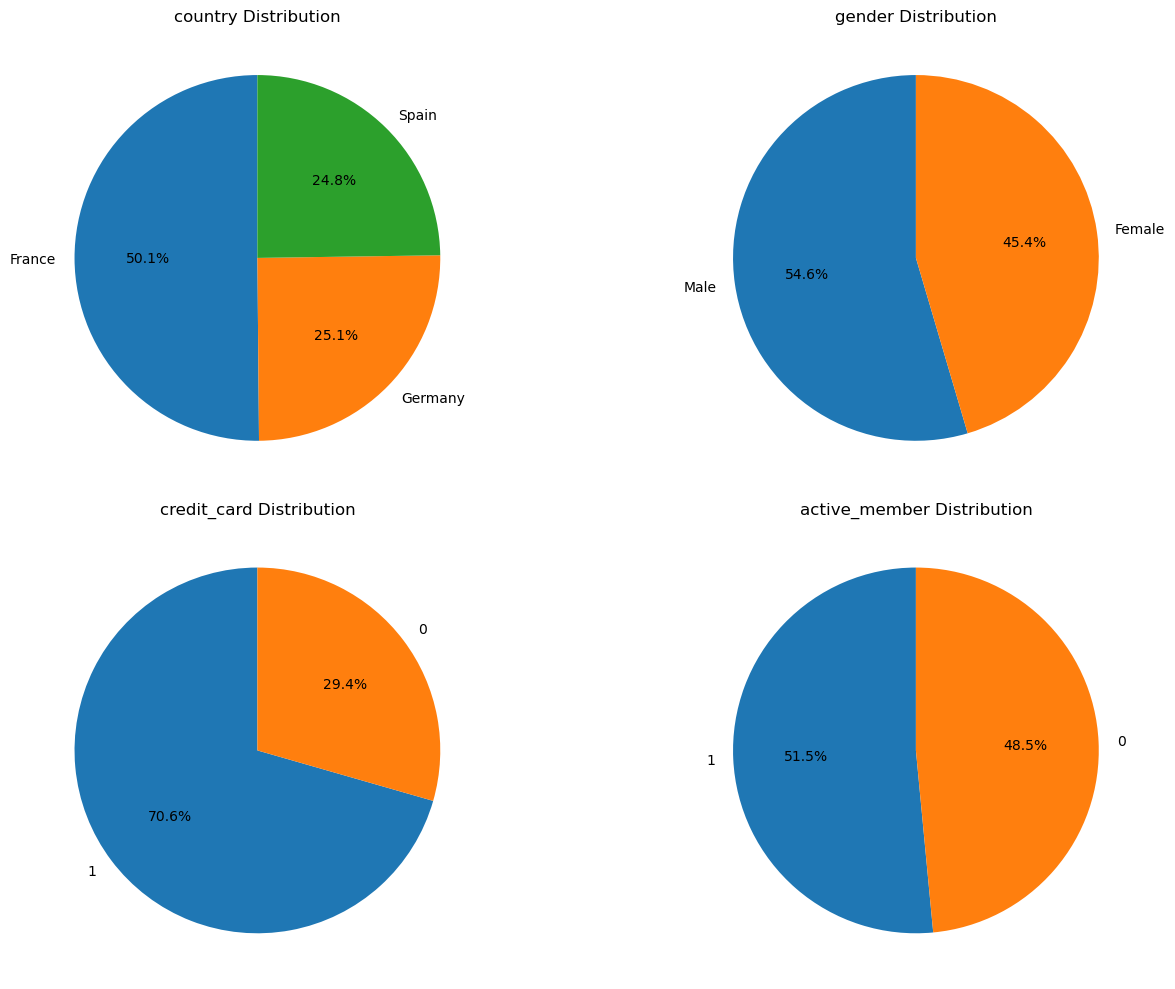

In [76]:
cat_obj=['country','gender','credit_card','active_member']
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

for i, var in enumerate(cat_obj):
    if i < len(axs.flat):
        obj_cont=df[var].value_counts()
        axs.flat[i].pie(obj_cont,labels=obj_cont.index,autopct="%1.1f%%",startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()

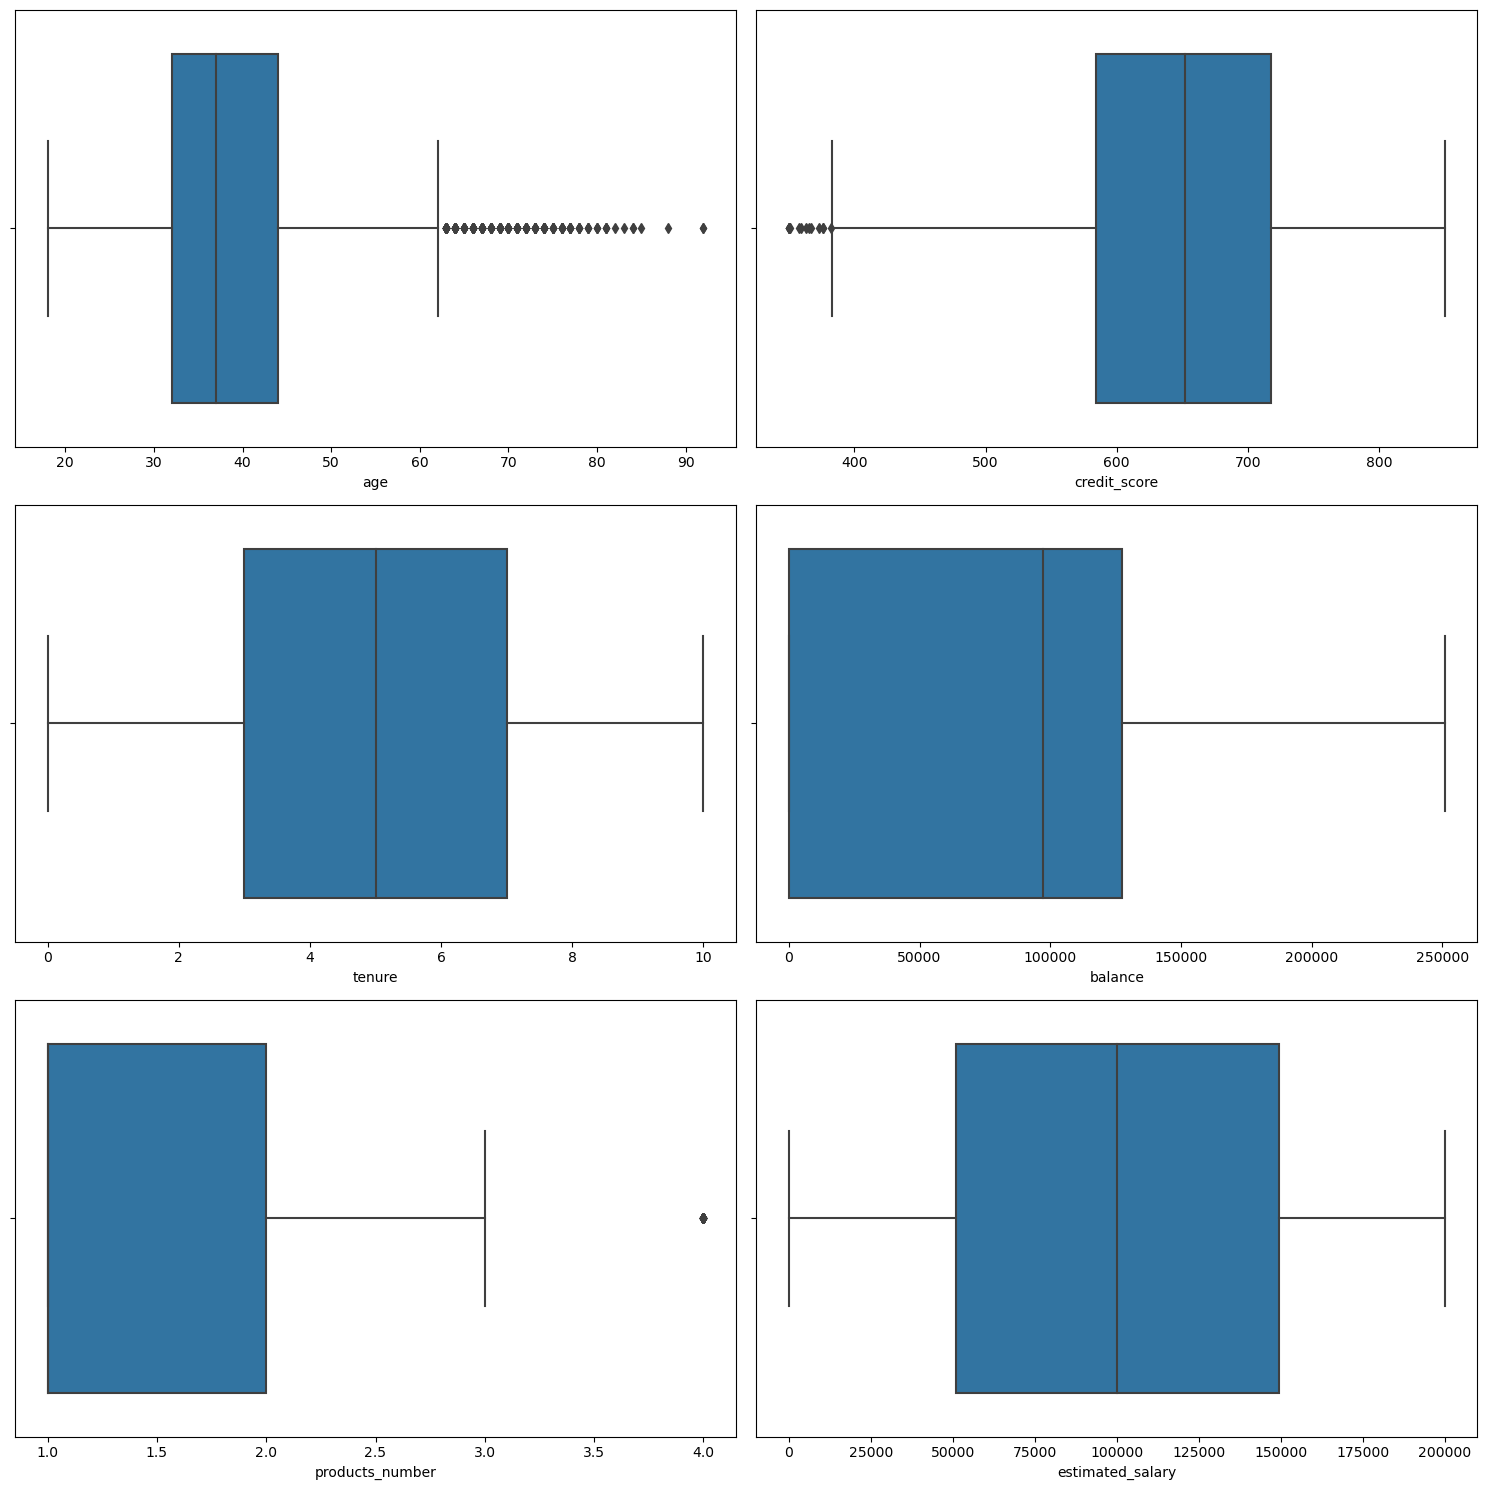

In [77]:
num=['age','credit_score','tenure','balance','products_number','estimated_salary']

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
axs=axs.flatten()

for i, var in enumerate(num):
    sns.boxplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

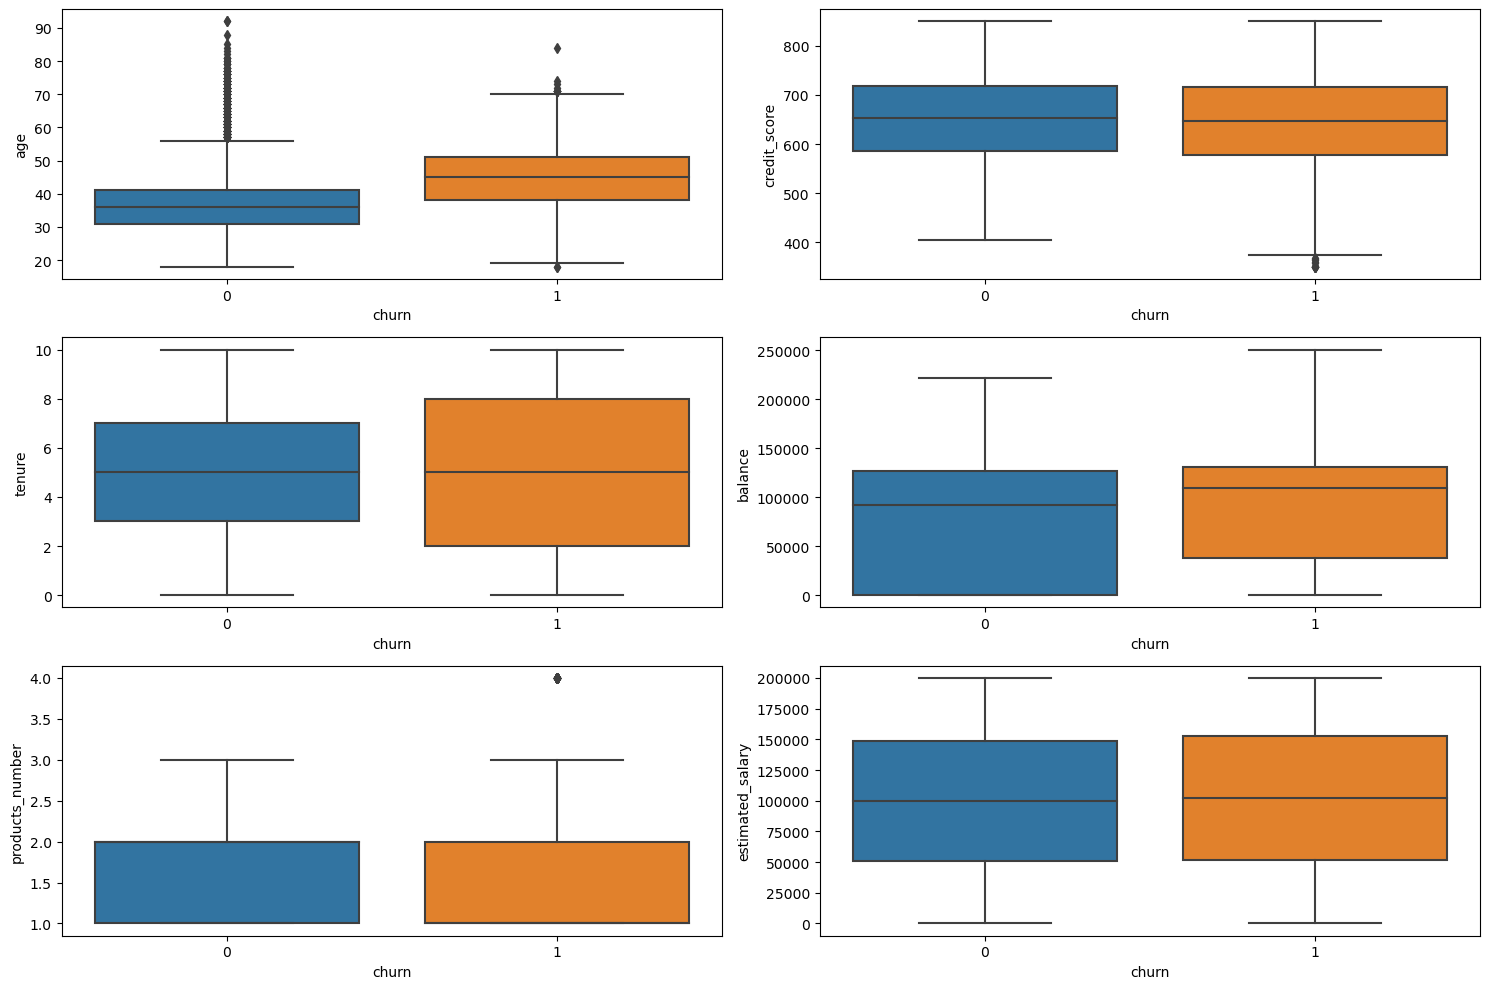

In [78]:
num=['age','credit_score','tenure','balance','products_number','estimated_salary']

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs=axs.flatten()
for i,var in enumerate (num):
    sns.boxplot(y=var,x='churn',data=df,ax=axs[i])
fig.tight_layout()
plt.show()


In [79]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}:\n{df[col].unique()}')

country:
['France' 'Spain' 'Germany']
gender:
['Female' 'Male']


In [80]:
for col in df.select_dtypes(include=['object']).columns:
    
    lable_encod=preprocessing.LabelEncoder()
    lable_encod.fit(df[col].unique())
    df[col]=lable_encod.transform(df[col])
    print(f'{col}:\n{df[col].unique()}')
    

country:
[0 2 1]
gender:
[0 1]


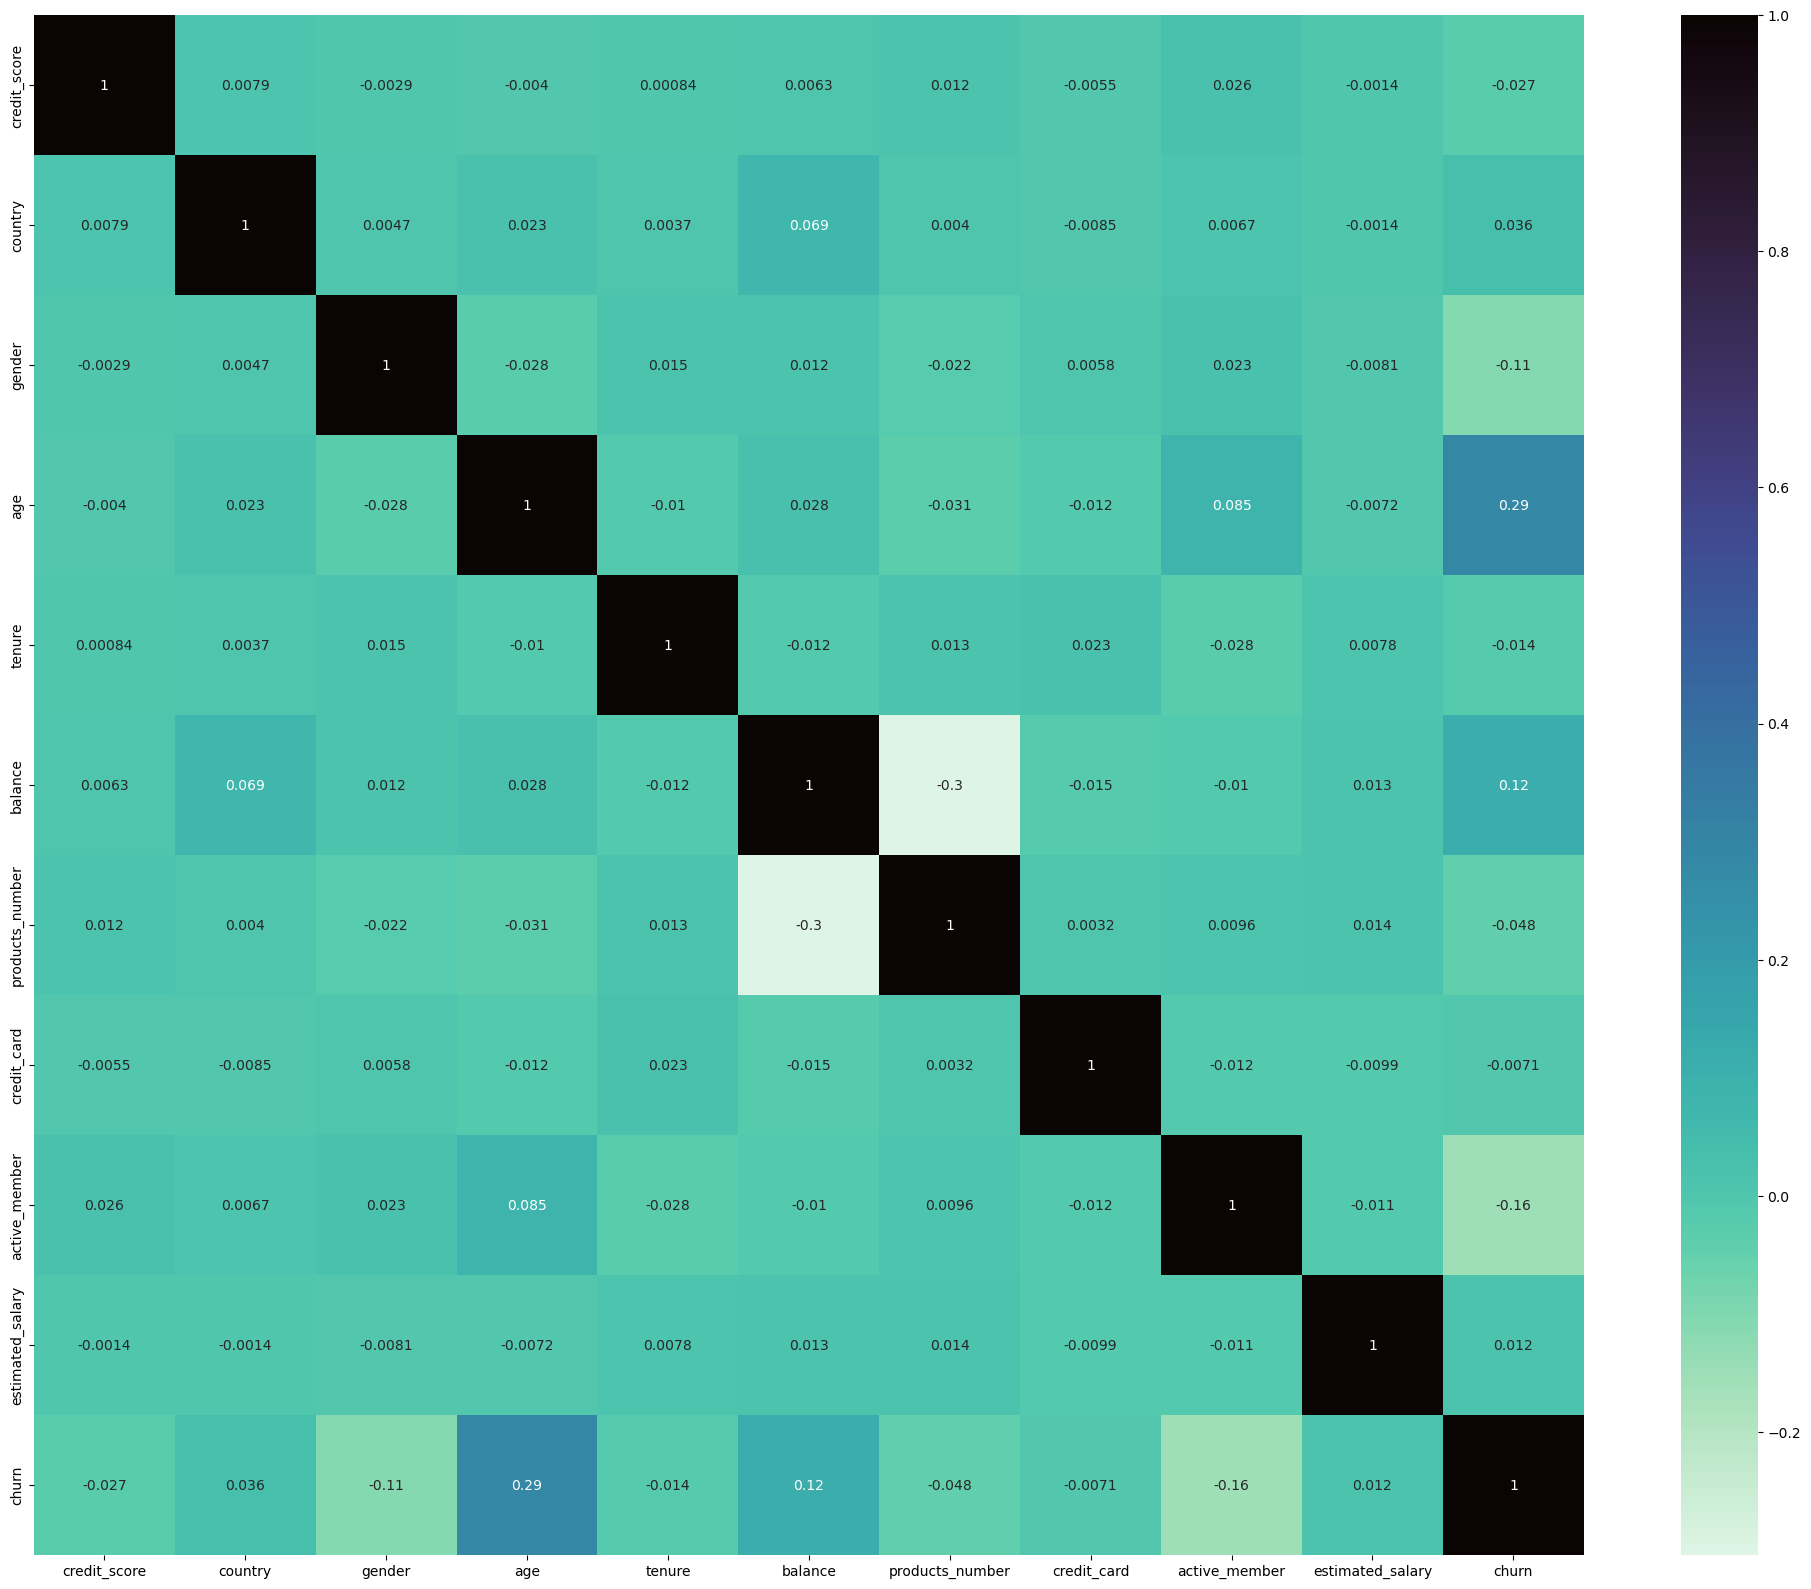

In [81]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap='mako_r',annot=True);

# Split to train

In [82]:
x = df.drop(['churn'], axis = 1)
y = df.churn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model 

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [90]:
mod = GradientBoostingClassifier()
mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.73      0.46      0.57       414

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [101]:
class_counts = np.bincount(y_train)

class_counts = np.bincount(y_train)
class_weights = {0: class_counts[1] / class_counts[0], 1: 1.0}

# Assign sample weights based on class labels
sample_weights = np.array([class_weights[label] for label in y_train])

# Train a Gradient Boosting classifier with sample weights
clf = GradientBoostingClassifier(random_state=42)
clf.fit(x_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred = clf.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1279  307]
 [ 121  293]]


In [102]:
mod = GradientBoostingClassifier()
mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.73      0.46      0.57       414

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



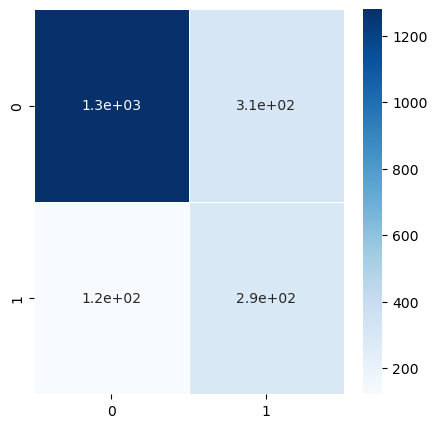

In [103]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_mat,annot=True,cmap="Blues",linewidths=0.5)
plt.show()
